In [2]:
import tensorflow as tf 
from tensorflow import keras

載入資料集(fashion_mnist)

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 11s 3us/step


In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

製作驗證組以及將像素尺度降為0-1之間

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[0]]

'Coat'

建立分類模型

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

''' or
model = Sequential([
    model.add(Flatten(input_shape=[28, 28]))
    model.add(Dense(300, activation="relu"))
    model.add(Dense(100, activation="relu"))
    model.add(Dense(10, activation="softmax"))
])
'''

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
#取得階層清單
model.layers

hidden1 = model.layers[1]
hidden1.name

'dense'

In [16]:
model.get_layer('dense') is hidden1

True

In [17]:
#取得參數

weights, biases = hidden1.get_weights()
weights

array([[ 0.07052931, -0.01767065, -0.03468414, ...,  0.00886471,
        -0.06968559, -0.01493316],
       [-0.00537051,  0.01387029,  0.02448081, ...,  0.02502297,
        -0.03937232, -0.00298154],
       [-0.00526917,  0.03227858, -0.00444372, ..., -0.04865788,
         0.06963743, -0.05006591],
       ...,
       [-0.00768428,  0.0019048 , -0.00216477, ...,  0.05416037,
         0.03434458, -0.05309908],
       [ 0.05878463, -0.05900495,  0.06294499, ..., -0.04191666,
         0.01598443,  0.06163958],
       [-0.02181765, -0.07391696,  0.02772903, ..., -0.00244069,
        -0.04114655, -0.04391563]], dtype=float32)

In [18]:
weights.shape

(784, 300)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
biases.shape

(300,)

編譯模型

In [21]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

採用"sparse_categorical_crossentropy"是因為標籤為稀疏,意指每個實例僅有一個目標索引

y_train
->>>>> array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

倘若每個實例皆有每個類別的目標機率
ex. one-hot ->>>>> [0., 0., 1.] 代表類別二


訓練集評估

In [23]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7338 - accuracy: 0.7594 - val_loss: 0.5785 - val_accuracy: 0.7862
Epoch 2/30
1719/1719 [==============================] - 2s 984us/step - loss: 0.4915 - accuracy: 0.8269 - val_loss: 0.4510 - val_accuracy: 0.8454
Epoch 3/30
1719/1719 [==============================] - 2s 996us/step - loss: 0.4452 - accuracy: 0.8432 - val_loss: 0.4357 - val_accuracy: 0.8524
Epoch 4/30
1719/1719 [==============================] - 2s 989us/step - loss: 0.4146 - accuracy: 0.8539 - val_loss: 0.3880 - val_accuracy: 0.8666
Epoch 5/30
1719/1719 [==============================] - 2s 991us/step - loss: 0.3954 - accuracy: 0.8611 - val_loss: 0.3766 - val_accuracy: 0.8730
Epoch 6/30
1719/1719 [==============================] - 2s 982us/step - loss: 0.3807 - accuracy: 0.8655 - val_loss: 0.3817 - val_accuracy: 0.8694
Epoch 7/30
1719/1719 [==============================] - 2s 996us/step - loss: 0.3669 - accuracy: 0.8700 - val_loss: 0.3742 - v

In [46]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.733770,0.759382,0.578457,0.7862
1,0.491530,0.826891,0.451032,0.8454
2,0.445179,0.843236,0.435666,0.8524
3,0.414586,0.853873,0.388026,0.8666
4,0.395383,0.861109,0.376620,0.8730
5,0.380688,0.865491,0.381679,0.8694
6,0.366901,0.869964,0.374152,0.8706
7,0.354378,0.874982,0.359371,0.8740
8,0.345064,0.876109,0.360098,0.8750
9,0.334697,0.881127,0.353895,0.8770


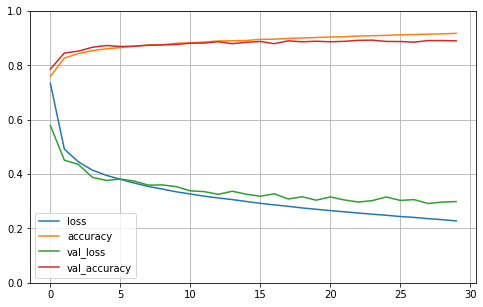

In [28]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) #將縱座標設為[0-1]
plt.show()

模型驗證及測試

In [29]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 984us/step - loss: 64.3692 - accuracy: 0.8468


[64.3691635131836, 0.8468000292778015]

In [31]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [32]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [35]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

建立回歸模型

In [48]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [49]:
model = Sequential([
    Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    Dense(1)
])

In [50]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 674us/step - loss: 0.7594 - val_loss: 10.7906
Epoch 2/20
363/363 [==============================] - 0s 545us/step - loss: 0.4910 - val_loss: 23.5368
Epoch 3/20
363/363 [==============================] - 0s 537us/step - loss: 0.5533 - val_loss: 13.9391
Epoch 4/20
363/363 [==============================] - 0s 503us/step - loss: 0.4731 - val_loss: 18.4506
Epoch 5/20
363/363 [==============================] - 0s 549us/step - loss: 0.4616 - val_loss: 0.3753
Epoch 6/20
363/363 [==============================] - 0s 559us/step - loss: 0.3982 - val_loss: 0.3677
Epoch 7/20
363/363 [==============================] - 0s 540us/step - loss: 0.3900 - val_loss: 0.3653
Epoch 8/20
363/363 [==============================] - 0s 549us/step - loss: 0.3852 - val_loss: 0.3738
Epoch 9/20
363/363 [==============================] - 0s 617us/step - loss: 0.3837 - val_loss: 0.4027
Epoch 10/20
363/363 [==============================] - 0s 533us/step - loss: 0

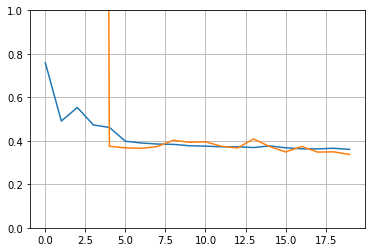

In [52]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [54]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

162/162 [==============================] - 0s 302us/step - loss: 0.3543


array([[0.64504963],
       [1.6663288 ],
       [4.1411757 ]], dtype=float32)

使用 Functional API 

In [58]:
from tensorflow.keras.layers import Input, Concatenate
from tensorflow.keras import Model

#residual模塊
input_ = Input(shape=X_train.shape[1:])
hidden1 = Dense(30, activation="relu")(input_)
hidden2 = Dense(30, activation="relu")(hidden1)
concat = Concatenate()([input_, hidden2])
output = Dense(1)(concat)
model = Model(inputs=[input_], outputs=[output])

In [60]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 30)           270         input_3[0][0]                    
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 30)           930         dense_15[0][0]                   
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 38)           0           input_3[0][0]                    
                                                                 dense_16[0][0]        

In [63]:
keras.utils.plot_model(model, "functional_model.png", show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [65]:
#多輸入

input_A = Input(shape=[5], name="wide_input")
input_B = Input(shape=[6], name="deep_input")
hidden1 = Dense(30, activation="relu")(input_B)
hidden2 = Dense(30, activation="relu")(hidden1)
concat = Concatenate()([input_A, hidden2])
output = Dense(1, name="output")(concat)
model = Model(inputs=[input_A, input_B], outputs=[output])

In [66]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [70]:
print(X_train.shape)
print(X_train_A.shape)
print(X_train_B.shape)

(11610, 8)
(11610, 5)
(11610, 6)


In [71]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 0s 779us/step - loss: 2.2613 - val_loss: 3.8818
Epoch 2/20
363/363 [==============================] - 0s 647us/step - loss: 0.7906 - val_loss: 2.1988
Epoch 3/20
363/363 [==============================] - 0s 676us/step - loss: 0.6745 - val_loss: 1.3711
Epoch 4/20
363/363 [==============================] - 0s 680us/step - loss: 0.6153 - val_loss: 0.9699
Epoch 5/20
363/363 [==============================] - 0s 668us/step - loss: 0.5731 - val_loss: 0.7527
Epoch 6/20
363/363 [==============================] - 0s 644us/step - loss: 0.5417 - val_loss: 0.6339
Epoch 7/20
363/363 [==============================] - 0s 697us/step - loss: 0.5184 - val_loss: 0.5632
Epoch 8/20
363/363 [==============================] - 0s 637us/step - loss: 0.5008 - val_loss: 0.5133
Epoch 9/20
363/363 [==============================] - 0s 666us/step - loss: 0.4874 - val_loss: 0.4913
Epoch 10/20
363/363 [==============================] - 0s 638us/step - loss: 0.476

In [72]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 397us/step - loss: 0.4194


In [73]:
mse_test

0.4194067120552063

In [74]:
y_pred = model.predict((X_new_A, X_new_B))

In [76]:
#多輸入多輸出

input_A = Input(shape=[5], name="wide_input")
input_B = Input(shape=[6], name="deep_input")
hidden1 = Dense(30, activation="relu")(input_B)
hidden2 = Dense(30, activation="relu")(hidden1)
concat = Concatenate()([input_A, hidden2])
output = Dense(1, name="main_output")(concat)
aux_output = Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [77]:
#可設置loss權重 
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [78]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 2.8361 - main_output_loss: 2.4672 - aux_output_loss: 6.1565 - val_loss: 1.4777 - val_main_output_loss: 1.0081 - val_aux_output_loss: 5.7040
Epoch 2/20
363/363 [==============================] - 0s 798us/step - loss: 1.1600 - main_output_loss: 0.8443 - aux_output_loss: 4.0007 - val_loss: 1.2099 - val_main_output_loss: 0.7179 - val_aux_output_loss: 5.6381
Epoch 3/20
363/363 [==============================] - 0s 821us/step - loss: 0.8851 - main_output_loss: 0.6901 - aux_output_loss: 2.6404 - val_loss: 1.2294 - val_main_output_loss: 0.6687 - val_aux_output_loss: 6.2754
Epoch 4/20
363/363 [==============================] - 0s 745us/step - loss: 0.7693 - main_output_loss: 0.6291 - aux_output_loss: 2.0306 - val_loss: 1.2148 - val_main_output_loss: 0.6180 - val_aux_output_loss: 6.5862
Epoch 5/20
363/363 [==============================] - 0s 804us/step - loss: 0.7095 - main_output_loss: 0.5926 - aux_output_loss: 1.7624 - 

In [79]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 518us/step - loss: 0.4903 - main_output_loss: 0.4249 - aux_output_loss: 1.0787


In [80]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

使用 Subclassing API

In [82]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) #處理標準引數
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [84]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 0s 974us/step - loss: 2.2290 - output_1_loss: 2.0371 - output_2_loss: 3.9567 - val_loss: 2.1687 - val_output_1_loss: 1.7081 - val_output_2_loss: 6.3140
Epoch 2/10
363/363 [==============================] - 0s 768us/step - loss: 0.9827 - output_1_loss: 0.8065 - output_2_loss: 2.5685 - val_loss: 1.2188 - val_output_1_loss: 0.6999 - val_output_2_loss: 5.8887
Epoch 3/10
363/363 [==============================] - 0s 774us/step - loss: 0.8243 - output_1_loss: 0.6932 - output_2_loss: 2.0047 - val_loss: 1.1507 - val_output_1_loss: 0.6351 - val_output_2_loss: 5.7918
Epoch 4/10
363/363 [==============================] - 0s 827us/step - loss: 0.7574 - output_1_loss: 0.6458 - output_2_loss: 1.7616 - val_loss: 1.0530 - val_output_1_loss: 0.5935 - val_output_2_loss: 5.1885
Epoch 5/10
363/363 [==============================] - 0s 770us/step - loss: 0.7142 - output_1_loss: 0.6128 - output_2_loss: 1.6270 - val_loss: 0.9705 - val_output_1_loss: 0.577

儲存模型與調用

In [86]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [87]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 736us/step - loss: 1.9915 - val_loss: 0.9594
Epoch 2/10
363/363 [==============================] - 0s 582us/step - loss: 0.7963 - val_loss: 0.7183
Epoch 3/10
363/363 [==============================] - 0s 607us/step - loss: 0.6839 - val_loss: 0.6595
Epoch 4/10
363/363 [==============================] - 0s 616us/step - loss: 0.6287 - val_loss: 0.6033
Epoch 5/10
363/363 [==============================] - 0s 594us/step - loss: 0.5882 - val_loss: 0.5756
Epoch 6/10
363/363 [==============================] - 0s 620us/step - loss: 0.5562 - val_loss: 0.5818
Epoch 7/10
363/363 [==============================] - 0s 652us/step - loss: 0.5303 - val_loss: 0.5012
Epoch 8/10
363/363 [==============================] - 0s 615us/step - loss: 0.5101 - val_loss: 0.5648
Epoch 9/10
363/363 [==============================] - 0s 622us/step - loss: 0.4925 - val_loss: 0.4788
Epoch 10/10
162/162 [==============================] - 0s 298us/step - loss: 0.463

In [88]:
model.save("my_keras_model.h5")

In [89]:
model = keras.models.load_model("my_keras_model.h5")

In [90]:
model.predict(X_new)

array([[0.5601214],
       [1.5411216],
       [3.015672 ]], dtype=float32)

In [91]:
model.save_weights("my_keras_weights.ckpt")

In [92]:
model.load_weights("my_keras_weights.ckpt")

使用Callback

In [93]:
keras.backend.clear_session()

In [94]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [95]:
#儲存驗證後最好的模型
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 0s 740us/step - loss: 2.2434 - val_loss: 1.3414
Epoch 2/10
363/363 [==============================] - 0s 620us/step - loss: 0.8465 - val_loss: 0.7230
Epoch 3/10
363/363 [==============================] - 0s 613us/step - loss: 0.6993 - val_loss: 0.6616
Epoch 4/10
363/363 [==============================] - 0s 598us/step - loss: 0.6442 - val_loss: 0.6751
Epoch 5/10
363/363 [==============================] - 0s 619us/step - loss: 0.6076 - val_loss: 0.5685
Epoch 6/10
363/363 [==============================] - 0s 629us/step - loss: 0.5764 - val_loss: 0.5439
Epoch 7/10
363/363 [==============================] - 0s 564us/step - loss: 0.5500 - val_loss: 0.5251
Epoch 8/10
363/363 [==============================] - 0s 614us/step - loss: 0.5268 - val_loss: 0.4934
Epoch 9/10
363/363 [==============================] - 0s 609us/step - loss: 0.5069 - val_loss: 0.4705
Epoch 10/10
363/363 [==============================] - 0s 612us/step - loss: 0.489

In [96]:
model = keras.models.load_model("my_keras_model.h5") 
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 365us/step - loss: 0.4758


In [97]:
#提前停止訓練
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

In [98]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 0s 749us/step - loss: 0.4745 - val_loss: 0.4491
Epoch 2/100
363/363 [==============================] - 0s 644us/step - loss: 0.4613 - val_loss: 0.4374
Epoch 3/100
363/363 [==============================] - 0s 592us/step - loss: 0.4507 - val_loss: 0.4214
Epoch 4/100
363/363 [==============================] - 0s 657us/step - loss: 0.4417 - val_loss: 0.4138
Epoch 5/100
363/363 [==============================] - 0s 584us/step - loss: 0.4338 - val_loss: 0.4177
Epoch 6/100
363/363 [==============================] - 0s 596us/step - loss: 0.4274 - val_loss: 0.4190
Epoch 7/100
363/363 [==============================] - 0s 600us/step - loss: 0.4217 - val_loss: 0.4181
Epoch 8/100
363/363 [==============================] - 0s 605us/step - loss: 0.4170 - val_loss: 0.4079
Epoch 9/100
363/363 [==============================] - 0s 595us/step - loss: 0.4125 - val_loss: 0.4239
Epoch 10/100
363/363 [==============================] - 0s 562us/step - l

In [99]:
#自己定義
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [100]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

Epoch 1/5
328/363 [==========================>...] - ETA: 0s - loss: 0.3690
val/train: 1.04
363/363 [==============================] - 0s 622us/step - loss: 0.3700 - val_loss: 0.3849
Epoch 2/5
321/363 [=========================>....] - ETA: 0s - loss: 0.3678
val/train: 1.04
363/363 [==============================] - 0s 606us/step - loss: 0.3694 - val_loss: 0.3826
Epoch 3/5
333/363 [==========================>...] - ETA: 0s - loss: 0.3665
val/train: 0.98
363/363 [==============================] - 0s 583us/step - loss: 0.3689 - val_loss: 0.3607
Epoch 4/5
337/363 [==========================>...] - ETA: 0s - loss: 0.3673
val/train: 1.09
363/363 [==============================] - 0s 610us/step - loss: 0.3682 - val_loss: 0.4008
Epoch 5/5
322/363 [=========================>....] - ETA: 0s - loss: 0.3705
val/train: 1.03
363/363 [==============================] - 0s 587us/step - loss: 0.3675 - val_loss: 0.3788


Tensorboard

In [111]:
#根據時間產生目錄
import os
root_logdir = os.path.join(os.curdir, "my_logs") #os.curdir -> 取得當前路徑

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [112]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [113]:
tensorboard_cd = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cd])

Epoch 1/30
363/363 [==============================] - 0s 876us/step - loss: 1.8601 - accuracy: 0.0025 - val_loss: 2.2697 - val_accuracy: 0.0044
Epoch 2/30
363/363 [==============================] - 0s 672us/step - loss: 0.7190 - accuracy: 0.0029 - val_loss: 0.6453 - val_accuracy: 0.0044
Epoch 3/30
363/363 [==============================] - 0s 656us/step - loss: 0.6270 - accuracy: 0.0029 - val_loss: 0.6093 - val_accuracy: 0.0044
Epoch 4/30
363/363 [==============================] - 0s 651us/step - loss: 0.5811 - accuracy: 0.0029 - val_loss: 0.5574 - val_accuracy: 0.0044
Epoch 5/30
363/363 [==============================] - 0s 659us/step - loss: 0.5474 - accuracy: 0.0029 - val_loss: 0.5198 - val_accuracy: 0.0044
Epoch 6/30
363/363 [==============================] - 0s 622us/step - loss: 0.5214 - accuracy: 0.0029 - val_loss: 0.5006 - val_accuracy: 0.0044
Epoch 7/30
363/363 [==============================] - 0s 641us/step - loss: 0.5005 - accuracy: 0.0029 - val_loss: 0.4717 - val_accuracy:

In [114]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 7347), started 0:04:17 ago. (Use '!kill 7347' to kill it.)

In [117]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1,1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.randn(2, 32, 32, 3)
        tf.summary.image("my_image", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

In [118]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 7347), started 1:16:20 ago. (Use '!kill 7347' to kill it.)

微調神經網路超參數

In [120]:
keras.backend.clear_session()

In [123]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [124]:
#用於實踐sklearn回歸接口
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [125]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 0s 663us/step - loss: 1.3293 - val_loss: 33.4581
Epoch 2/100
363/363 [==============================] - 0s 564us/step - loss: 0.9855 - val_loss: 23.5270
Epoch 3/100
363/363 [==============================] - 0s 579us/step - loss: 0.8313 - val_loss: 0.5811
Epoch 4/100
363/363 [==============================] - 0s 565us/step - loss: 0.5868 - val_loss: 0.5302
Epoch 5/100
363/363 [==============================] - 0s 536us/step - loss: 0.5348 - val_loss: 0.4950
Epoch 6/100
363/363 [==============================] - 0s 556us/step - loss: 0.4942 - val_loss: 0.4687
Epoch 7/100
363/363 [==============================] - 0s 534us/step - loss: 0.4672 - val_loss: 0.4331
Epoch 8/100
363/363 [==============================] - 0s 559us/step - loss: 0.4498 - val_loss: 0.4154
Epoch 9/100
363/363 [==============================] - 0s 526us/step - loss: 0.4382 - val_loss: 0.4095
Epoch 10/100
363/363 [==============================] - 0s 575us/step -

In [126]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 363us/step - loss: 0.3669


In [135]:
y_pred = keras_reg.predict(X_new)

In [145]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=50,
                  validation_data=(X_valid, y_valid),
                  #callbacks=[keras.callbacks.EarlyStopping(patience=10)]
                 )

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.0055152207481209145, n_hidden=3, n_neurons=64 ...
Epoch 1/50
  1/242 [..............................] - ETA: 0s - loss: 4.8687

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


242/242 [==============================] - 0s 947us/step - loss: 1.2131 - val_loss: 0.5133
Epoch 2/50
242/242 [==============================] - 0s 719us/step - loss: 0.4964 - val_loss: 0.7087
Epoch 3/50
242/242 [==============================] - 0s 751us/step - loss: 0.4375 - val_loss: 1.7544
Epoch 4/50
242/242 [==============================] - 0s 725us/step - loss: 0.4221 - val_loss: 5.2576
Epoch 5/50
242/242 [==============================] - 0s 746us/step - loss: 0.4605 - val_loss: 1.3208
Epoch 6/50
242/242 [==============================] - 0s 694us/step - loss: 0.3904 - val_loss: 0.4635
Epoch 7/50
242/242 [==============================] - 0s 737us/step - loss: 0.3645 - val_loss: 0.3785
Epoch 8/50
242/242 [==============================] - 0s 751us/step - loss: 0.3562 - val_loss: 0.3390
Epoch 9/50
242/242 [==============================] - 0s 734us/step - loss: 0.3499 - val_loss: 0.3431
Epoch 10/50
242/242 [==============================] - 0s 723us/step - loss: 0.3468 - val_los

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.3s remaining:    0.0s


242/242 [==============================] - 0s 947us/step - loss: 0.9955 - val_loss: 1.2136
Epoch 2/50
242/242 [==============================] - 0s 775us/step - loss: 0.5459 - val_loss: 0.4548
Epoch 3/50
242/242 [==============================] - 0s 721us/step - loss: 0.4490 - val_loss: 0.4267
Epoch 4/50
242/242 [==============================] - 0s 752us/step - loss: 0.4092 - val_loss: 0.3685
Epoch 5/50
242/242 [==============================] - 0s 763us/step - loss: 0.3903 - val_loss: 0.5466
Epoch 6/50
242/242 [==============================] - 0s 736us/step - loss: 0.3788 - val_loss: 0.6541
Epoch 7/50
242/242 [==============================] - 0s 737us/step - loss: 0.3704 - val_loss: 0.9117
Epoch 8/50
242/242 [==============================] - 0s 696us/step - loss: 0.3640 - val_loss: 0.9674
Epoch 9/50
242/242 [==============================] - 0s 775us/step - loss: 0.3587 - val_loss: 0.8596
Epoch 10/50
242/242 [==============================] - 0s 739us/step - loss: 0.3535 - val_los

242/242 [==============================] - 0s 707us/step - loss: 0.3073 - val_loss: 0.3379
Epoch 29/50
242/242 [==============================] - 0s 719us/step - loss: 0.3074 - val_loss: 0.3515
Epoch 30/50
242/242 [==============================] - 0s 764us/step - loss: 0.3041 - val_loss: 0.3732
Epoch 31/50
242/242 [==============================] - 0s 729us/step - loss: 0.3038 - val_loss: 0.4783
Epoch 32/50
242/242 [==============================] - 0s 691us/step - loss: 0.3055 - val_loss: 0.3952
Epoch 33/50
242/242 [==============================] - 0s 725us/step - loss: 0.3029 - val_loss: 0.3015
Epoch 34/50
242/242 [==============================] - 0s 715us/step - loss: 0.2994 - val_loss: 0.3200
Epoch 35/50
242/242 [==============================] - 0s 729us/step - loss: 0.2976 - val_loss: 0.3285
Epoch 36/50
242/242 [==============================] - 0s 669us/step - loss: 0.3017 - val_loss: 0.3125
Epoch 37/50
242/242 [==============================] - 0s 709us/step - loss: 0.2959 -

242/242 [==============================] - 0s 626us/step - loss: 0.5159 - val_loss: 4.9912
Epoch 4/50
242/242 [==============================] - 0s 561us/step - loss: 0.4672 - val_loss: 4.9049
Epoch 5/50
242/242 [==============================] - 0s 566us/step - loss: 0.4401 - val_loss: 4.5599
Epoch 6/50
242/242 [==============================] - 0s 631us/step - loss: 0.4242 - val_loss: 4.0331
Epoch 7/50
242/242 [==============================] - 0s 639us/step - loss: 0.4153 - val_loss: 3.5372
Epoch 8/50
242/242 [==============================] - 0s 676us/step - loss: 0.4080 - val_loss: 3.0613
Epoch 9/50
242/242 [==============================] - 0s 687us/step - loss: 0.3997 - val_loss: 2.6364
Epoch 10/50
242/242 [==============================] - 0s 687us/step - loss: 0.3945 - val_loss: 2.4013
Epoch 11/50
242/242 [==============================] - 0s 637us/step - loss: 0.3903 - val_loss: 2.0786
Epoch 12/50
242/242 [==============================] - 0s 669us/step - loss: 0.3854 - val_l

242/242 [==============================] - 0s 603us/step - loss: 0.3666 - val_loss: 0.3654
Epoch 31/50
242/242 [==============================] - 0s 598us/step - loss: 0.3694 - val_loss: 0.3524
Epoch 32/50
242/242 [==============================] - 0s 568us/step - loss: 0.3654 - val_loss: 0.4021
Epoch 33/50
242/242 [==============================] - 0s 639us/step - loss: 0.3657 - val_loss: 0.3430
Epoch 34/50
242/242 [==============================] - 0s 610us/step - loss: 0.3668 - val_loss: 0.3545
Epoch 35/50
242/242 [==============================] - 0s 642us/step - loss: 0.3640 - val_loss: 0.3672
Epoch 36/50
242/242 [==============================] - 0s 581us/step - loss: 0.3624 - val_loss: 0.3410
Epoch 37/50
242/242 [==============================] - 0s 552us/step - loss: 0.3624 - val_loss: 0.3426
Epoch 38/50
242/242 [==============================] - 0s 568us/step - loss: 0.3606 - val_loss: 0.4290
Epoch 39/50
242/242 [==============================] - 0s 594us/step - loss: 0.3604 -

242/242 [==============================] - 0s 625us/step - loss: 0.3807 - val_loss: 0.3517
Epoch 6/50
242/242 [==============================] - 0s 625us/step - loss: 0.3830 - val_loss: 0.4851
Epoch 7/50
242/242 [==============================] - 0s 652us/step - loss: 0.3676 - val_loss: 0.3732
Epoch 8/50
242/242 [==============================] - 0s 578us/step - loss: 0.3657 - val_loss: 0.4602
Epoch 9/50
242/242 [==============================] - 0s 693us/step - loss: 0.3608 - val_loss: 0.3750
Epoch 10/50
242/242 [==============================] - 0s 633us/step - loss: 0.3563 - val_loss: 0.3764
Epoch 11/50
242/242 [==============================] - 0s 702us/step - loss: 0.3558 - val_loss: 0.5232
Epoch 12/50
242/242 [==============================] - 0s 677us/step - loss: 0.3578 - val_loss: 0.3340
Epoch 13/50
242/242 [==============================] - 0s 683us/step - loss: 0.3514 - val_loss: 0.3872
Epoch 14/50
242/242 [==============================] - 0s 648us/step - loss: 0.3504 - val

242/242 [==============================] - 0s 672us/step - loss: 0.3239 - val_loss: 0.3081
Epoch 33/50
242/242 [==============================] - 0s 622us/step - loss: 0.3212 - val_loss: 0.3916
Epoch 34/50
242/242 [==============================] - 0s 609us/step - loss: 0.3257 - val_loss: 0.3246
Epoch 35/50
242/242 [==============================] - 0s 646us/step - loss: 0.3199 - val_loss: 0.3156
Epoch 36/50
242/242 [==============================] - 0s 650us/step - loss: 0.3162 - val_loss: 0.3418
Epoch 37/50
242/242 [==============================] - 0s 621us/step - loss: 0.3160 - val_loss: 0.3105
Epoch 38/50
242/242 [==============================] - 0s 612us/step - loss: 0.3145 - val_loss: 0.3255
Epoch 39/50
242/242 [==============================] - 0s 685us/step - loss: 0.3142 - val_loss: 0.3154
Epoch 40/50
242/242 [==============================] - 0s 655us/step - loss: 0.3129 - val_loss: 0.3334
Epoch 41/50
242/242 [==============================] - 0s 639us/step - loss: 0.3108 -

242/242 [==============================] - 0s 708us/step - loss: 0.7074 - val_loss: 8.2910
Epoch 8/50
242/242 [==============================] - 0s 616us/step - loss: 0.6881 - val_loss: 7.0432
Epoch 9/50
242/242 [==============================] - 0s 684us/step - loss: 0.6710 - val_loss: 6.0447
Epoch 10/50
242/242 [==============================] - 0s 638us/step - loss: 0.6550 - val_loss: 5.2075
Epoch 11/50
242/242 [==============================] - 0s 668us/step - loss: 0.6406 - val_loss: 4.6301
Epoch 12/50
242/242 [==============================] - 0s 693us/step - loss: 0.6269 - val_loss: 4.0374
Epoch 13/50
242/242 [==============================] - 0s 631us/step - loss: 0.6139 - val_loss: 3.5581
Epoch 14/50
242/242 [==============================] - 0s 631us/step - loss: 0.6015 - val_loss: 3.1640
Epoch 15/50
242/242 [==============================] - 0s 634us/step - loss: 0.5897 - val_loss: 2.8447
Epoch 16/50
242/242 [==============================] - 0s 642us/step - loss: 0.5782 - v

242/242 [==============================] - 0s 659us/step - loss: 0.4125 - val_loss: 0.4880
Epoch 35/50
242/242 [==============================] - 0s 678us/step - loss: 0.4114 - val_loss: 0.4817
Epoch 36/50
242/242 [==============================] - 0s 650us/step - loss: 0.4103 - val_loss: 0.4851
Epoch 37/50
242/242 [==============================] - 0s 644us/step - loss: 0.4093 - val_loss: 0.4800
Epoch 38/50
242/242 [==============================] - 0s 642us/step - loss: 0.4085 - val_loss: 0.4825
Epoch 39/50
242/242 [==============================] - 0s 668us/step - loss: 0.4075 - val_loss: 0.4798
Epoch 40/50
242/242 [==============================] - 0s 615us/step - loss: 0.4068 - val_loss: 0.4813
Epoch 41/50
242/242 [==============================] - 0s 663us/step - loss: 0.4059 - val_loss: 0.4784
Epoch 42/50
242/242 [==============================] - 0s 662us/step - loss: 0.4051 - val_loss: 0.4718
Epoch 43/50
242/242 [==============================] - 0s 624us/step - loss: 0.4043 -

242/242 [==============================] - 0s 607us/step - loss: 0.5911 - val_loss: 1.1935
Epoch 10/50
242/242 [==============================] - 0s 604us/step - loss: 0.5803 - val_loss: 1.8591
Epoch 11/50
242/242 [==============================] - 0s 587us/step - loss: 0.5714 - val_loss: 2.6895
Epoch 12/50
242/242 [==============================] - 0s 621us/step - loss: 0.5639 - val_loss: 3.6365
Epoch 13/50
242/242 [==============================] - 0s 597us/step - loss: 0.5573 - val_loss: 4.6543
Epoch 14/50
242/242 [==============================] - 0s 566us/step - loss: 0.5516 - val_loss: 5.6770
Epoch 15/50
242/242 [==============================] - 0s 538us/step - loss: 0.5466 - val_loss: 6.7249
Epoch 16/50
242/242 [==============================] - 0s 586us/step - loss: 0.5422 - val_loss: 7.7432
Epoch 17/50
242/242 [==============================] - 0s 596us/step - loss: 0.5383 - val_loss: 8.7802
Epoch 18/50
242/242 [==============================] - 0s 624us/step - loss: 0.5349 -

242/242 [==============================] - 0s 668us/step - loss: 0.5398 - val_loss: 0.6903
Epoch 37/50
242/242 [==============================] - 0s 634us/step - loss: 0.5387 - val_loss: 0.7381
Epoch 38/50
242/242 [==============================] - 0s 488us/step - loss: 0.5386 - val_loss: 0.7182
Epoch 39/50
242/242 [==============================] - 0s 573us/step - loss: 0.5374 - val_loss: 0.7569
Epoch 40/50
242/242 [==============================] - 0s 566us/step - loss: 0.5376 - val_loss: 0.6468
Epoch 41/50
242/242 [==============================] - 0s 544us/step - loss: 0.5358 - val_loss: 0.7141
Epoch 42/50
242/242 [==============================] - 0s 537us/step - loss: 0.5362 - val_loss: 0.6771
Epoch 43/50
242/242 [==============================] - 0s 574us/step - loss: 0.5351 - val_loss: 0.6885
Epoch 44/50
242/242 [==============================] - 0s 628us/step - loss: 0.5340 - val_loss: 0.7649
Epoch 45/50
242/242 [==============================] - 0s 574us/step - loss: 0.5348 -

242/242 [==============================] - 0s 539us/step - loss: 0.5057 - val_loss: 20.3349
Epoch 12/50
242/242 [==============================] - 0s 592us/step - loss: 0.5046 - val_loss: 20.7090
Epoch 13/50
242/242 [==============================] - 0s 514us/step - loss: 0.5033 - val_loss: 20.3210
Epoch 14/50
242/242 [==============================] - 0s 551us/step - loss: 0.5026 - val_loss: 20.1934
Epoch 15/50
242/242 [==============================] - 0s 483us/step - loss: 0.5018 - val_loss: 20.5988
Epoch 16/50
242/242 [==============================] - 0s 451us/step - loss: 0.5012 - val_loss: 20.8454
Epoch 17/50
242/242 [==============================] - 0s 491us/step - loss: 0.5013 - val_loss: 20.8108
Epoch 18/50
242/242 [==============================] - 0s 531us/step - loss: 0.5005 - val_loss: 20.9689
Epoch 19/50
242/242 [==============================] - 0s 523us/step - loss: 0.5003 - val_loss: 21.0648
Epoch 20/50
242/242 [==============================] - 0s 572us/step - loss:

242/242 [==============================] - 0s 529us/step - loss: 0.5380 - val_loss: 1.4082
Epoch 39/50
242/242 [==============================] - 0s 525us/step - loss: 0.5374 - val_loss: 0.5303
Epoch 40/50
242/242 [==============================] - 0s 512us/step - loss: 0.5311 - val_loss: 0.6603
Epoch 41/50
242/242 [==============================] - 0s 513us/step - loss: 0.5416 - val_loss: 0.8767
Epoch 42/50
242/242 [==============================] - 0s 557us/step - loss: 0.5335 - val_loss: 0.4952
Epoch 43/50
242/242 [==============================] - 0s 517us/step - loss: 0.5280 - val_loss: 1.1892
Epoch 44/50
242/242 [==============================] - 0s 522us/step - loss: 0.5472 - val_loss: 2.3311
Epoch 45/50
242/242 [==============================] - 0s 468us/step - loss: 0.5352 - val_loss: 2.9939
Epoch 46/50
242/242 [==============================] - 0s 509us/step - loss: 0.5731 - val_loss: 1.9082
Epoch 47/50
242/242 [==============================] - 0s 487us/step - loss: 0.5336 -

242/242 [==============================] - 0s 528us/step - loss: 0.5323 - val_loss: 10.9855
Epoch 5/50
242/242 [==============================] - 0s 581us/step - loss: 0.5205 - val_loss: 14.0099
Epoch 6/50
242/242 [==============================] - 0s 485us/step - loss: 0.5117 - val_loss: 17.5521
Epoch 7/50
242/242 [==============================] - 0s 527us/step - loss: 0.5106 - val_loss: 17.8235
Epoch 8/50
242/242 [==============================] - 0s 490us/step - loss: 0.5077 - val_loss: 19.4711
Epoch 9/50
242/242 [==============================] - 0s 519us/step - loss: 0.5052 - val_loss: 20.1474
Epoch 10/50
242/242 [==============================] - 0s 511us/step - loss: 0.5037 - val_loss: 20.7977
Epoch 11/50
242/242 [==============================] - 0s 464us/step - loss: 0.5021 - val_loss: 19.7214
Epoch 12/50
242/242 [==============================] - 0s 485us/step - loss: 0.5035 - val_loss: 18.5316
Epoch 13/50
242/242 [==============================] - 0s 533us/step - loss: 0.50

242/242 [==============================] - 0s 506us/step - loss: 19531.3438 - val_loss: 6725307.0000
Epoch 30/50
242/242 [==============================] - 0s 453us/step - loss: 43076.9844 - val_loss: 9853913.0000
Epoch 31/50
242/242 [==============================] - 0s 510us/step - loss: 124013.9766 - val_loss: 14638027.0000
Epoch 32/50
242/242 [==============================] - 0s 551us/step - loss: 62310.8242 - val_loss: 22010732.0000
Epoch 33/50
242/242 [==============================] - 0s 470us/step - loss: 128472.1094 - val_loss: 32166202.0000
Epoch 34/50
242/242 [==============================] - 0s 493us/step - loss: 629701.0625 - val_loss: 47641864.0000
Epoch 35/50
242/242 [==============================] - 0s 498us/step - loss: 450994.8125 - val_loss: 70195512.0000
Epoch 36/50
242/242 [==============================] - 0s 476us/step - loss: 1299679.3750 - val_loss: 103581256.0000
Epoch 37/50
242/242 [==============================] - 0s 503us/step - loss: 513337.6562 - val_

242/242 [==============================] - 0s 868us/step - loss: 2.8275 - val_loss: 2.7195
Epoch 2/50
242/242 [==============================] - 0s 645us/step - loss: 1.2711 - val_loss: 3.1046
Epoch 3/50
242/242 [==============================] - 0s 669us/step - loss: 0.9576 - val_loss: 2.8682
Epoch 4/50
242/242 [==============================] - 0s 653us/step - loss: 0.8233 - val_loss: 2.5182
Epoch 5/50
242/242 [==============================] - 0s 670us/step - loss: 0.7434 - val_loss: 2.1426
Epoch 6/50
242/242 [==============================] - 0s 680us/step - loss: 0.6919 - val_loss: 1.8445
Epoch 7/50
242/242 [==============================] - 0s 698us/step - loss: 0.6569 - val_loss: 1.5810
Epoch 8/50
242/242 [==============================] - 0s 672us/step - loss: 0.6308 - val_loss: 1.3552
Epoch 9/50
242/242 [==============================] - 0s 613us/step - loss: 0.6100 - val_loss: 1.1584
Epoch 10/50
242/242 [==============================] - 0s 682us/step - loss: 0.5926 - val_los

242/242 [==============================] - 0s 630us/step - loss: 0.5701 - val_loss: 0.5374
Epoch 29/50
242/242 [==============================] - 0s 612us/step - loss: 0.5630 - val_loss: 0.5313
Epoch 30/50
242/242 [==============================] - 0s 615us/step - loss: 0.5560 - val_loss: 0.5243
Epoch 31/50
242/242 [==============================] - 0s 630us/step - loss: 0.5491 - val_loss: 0.5175
Epoch 32/50
242/242 [==============================] - 0s 626us/step - loss: 0.5423 - val_loss: 0.5108
Epoch 33/50
242/242 [==============================] - 0s 683us/step - loss: 0.5359 - val_loss: 0.5049
Epoch 34/50
242/242 [==============================] - 0s 632us/step - loss: 0.5295 - val_loss: 0.4994
Epoch 35/50
242/242 [==============================] - 0s 624us/step - loss: 0.5237 - val_loss: 0.4925
Epoch 36/50
242/242 [==============================] - 0s 611us/step - loss: 0.5177 - val_loss: 0.4868
Epoch 37/50
242/242 [==============================] - 0s 672us/step - loss: 0.5121 -

242/242 [==============================] - 0s 588us/step - loss: 16220425716067382489398640640.0000 - val_loss: 30115222264597092191970030256128.0000
Epoch 44/50
242/242 [==============================] - 0s 569us/step - loss: 64044389507924878904044552192.0000 - val_loss: 146624171504291465855869252534272.0000
Epoch 45/50
242/242 [==============================] - 0s 598us/step - loss: 291626644277202177684536295424.0000 - val_loss: 724013177909929875924379043364864.0000
Epoch 46/50
242/242 [==============================] - 0s 526us/step - loss: 1872167760581699195334006145024.0000 - val_loss: 3519541521910811100495528813658112.0000
Epoch 47/50
242/242 [==============================] - 0s 570us/step - loss: 9901582406194199948625939791872.0000 - val_loss: 17294867861863594355068521511124992.0000
Epoch 48/50
242/242 [==============================] - 0s 556us/step - loss: 249371318512105986768017419141120.0000 - val_loss: 83613550248152325792810799110029312.0000
Epoch 49/50
242/242 [

242/242 [==============================] - 0s 547us/step - loss: 8.4503 - val_loss: 2659.7532
Epoch 14/50
242/242 [==============================] - 0s 543us/step - loss: 5.7671 - val_loss: 4101.5273
Epoch 15/50
242/242 [==============================] - 0s 522us/step - loss: 4.5670 - val_loss: 2639.7646
Epoch 16/50
242/242 [==============================] - 0s 616us/step - loss: 42.1368 - val_loss: 3631.5010
Epoch 17/50
242/242 [==============================] - 0s 544us/step - loss: 4.0070 - val_loss: 2101.8403
Epoch 18/50
242/242 [==============================] - 0s 651us/step - loss: 45.2281 - val_loss: 2541.2825
Epoch 19/50
242/242 [==============================] - 0s 581us/step - loss: 15.5576 - val_loss: 8807.5547
Epoch 20/50
242/242 [==============================] - 0s 517us/step - loss: 48.5057 - val_loss: 12353.7217
Epoch 21/50
242/242 [==============================] - 0s 566us/step - loss: 115.2681 - val_loss: 14802.2158
Epoch 22/50
242/242 [=============================

242/242 [==============================] - 0s 644us/step - loss: 0.3088 - val_loss: 0.3098
Epoch 39/50
242/242 [==============================] - 0s 679us/step - loss: 0.3071 - val_loss: 0.3566
Epoch 40/50
242/242 [==============================] - 0s 740us/step - loss: 0.3063 - val_loss: 0.3444
Epoch 41/50
242/242 [==============================] - 0s 754us/step - loss: 0.3087 - val_loss: 0.3046
Epoch 42/50
242/242 [==============================] - 0s 714us/step - loss: 0.3058 - val_loss: 0.3401
Epoch 43/50
242/242 [==============================] - 0s 726us/step - loss: 0.3086 - val_loss: 0.3539
Epoch 44/50
242/242 [==============================] - 0s 761us/step - loss: 0.3132 - val_loss: 0.3198
Epoch 45/50
242/242 [==============================] - 0s 639us/step - loss: 0.3042 - val_loss: 0.3261
Epoch 46/50
242/242 [==============================] - 0s 595us/step - loss: 0.3036 - val_loss: 0.3586
Epoch 47/50
242/242 [==============================] - 0s 637us/step - loss: 0.3349 -

242/242 [==============================] - 0s 648us/step - loss: 0.3650 - val_loss: 0.4129
Epoch 14/50
242/242 [==============================] - 0s 627us/step - loss: 0.3744 - val_loss: 0.3869
Epoch 15/50
242/242 [==============================] - 0s 649us/step - loss: 0.3627 - val_loss: 0.3842
Epoch 16/50
242/242 [==============================] - 0s 683us/step - loss: 0.3675 - val_loss: 0.3818
Epoch 17/50
242/242 [==============================] - 0s 617us/step - loss: 0.3588 - val_loss: 0.3750
Epoch 18/50
242/242 [==============================] - 0s 649us/step - loss: 0.3660 - val_loss: 0.3670
Epoch 19/50
242/242 [==============================] - 0s 655us/step - loss: 0.3602 - val_loss: 0.3609
Epoch 20/50
242/242 [==============================] - 0s 622us/step - loss: 0.3541 - val_loss: 0.3633
Epoch 21/50
242/242 [==============================] - 0s 601us/step - loss: 0.3502 - val_loss: 0.3548
Epoch 22/50
242/242 [==============================] - 0s 623us/step - loss: 0.3491 -

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.9min finished


RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f56c43f9ba8>, as the constructor either does not set or modifies parameter learning_rate

In [146]:
rnd_search_cv.best_params_

{'learning_rate': 0.0055152207481209145, 'n_hidden': 3, 'n_neurons': 64}

In [147]:
rnd_search_cv.best_score_

-0.312321017185847

In [ ]:
rnd_search_cv.best_estimator_

In [ ]:
rnd_search_cv.score(X_test, y_test)

In [ ]:
model = rnd_search_cv.best_estimator_.model
model

In [151]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 422us/step - loss: 0.3768 - accuracy: 0.0021


[0.3767662048339844, 0.0021317829377949238]